# Importing Libraries

In [76]:
import numpy as numpy
import matplotlib.pyplot as plt
import copy
from prettytable import PrettyTable as ptbl
from math import *

MaxIterations = 1000

# Function Definitions

In [77]:
def BisectionMethod(f, A, B, TOL, N = MaxIterations):
    
    # Copy Input argument into local variable to avoid data over-writting
    a = copy.copy(A)
    b = copy.copy(B)

    print("\n\n***** BISECTION METHOD *****")
    i = 1
    
    data =[]        # list for storing data to plot table
    accuracy = []   # list for storing data to plot graph

    while i<=N:
        
        # Finding Midpoint
        m = (a+b)/2
        
        # Finding Function Value at a b and m
        fa = f(a)
        fm = f(m)
        fb = f(b)
        
        print(f'iteration = {i:3}  a = {a:.6f}  b = {b:.6f}  m = {m:.6f}  f(m) = {fm:.6f}')
        
        # Adding data in data list which was created for plotting table
        data.append([i,a,b,m,f(m)])
        
        if abs(fm) <=TOL and (abs(m-a)) < TOL:
            print(f'\nFinal Root Found')
            print(f'iteration = {i:3}  a = {a:.6f}  b = {b:.6f}  m = {m:.6f}  f(m) = {fm:.6f}')
            print(f"Required Root is: {m:.6f}")
            if fa*fm>0:
                accuracyReached = abs(a-m)
                a = m
            else:
                accuracyReached = abs(b-m)
                b = m
            
            accuracy.append([i,accuracyReached])
            break
                
        accuracyReached = 0
        
        # Checking Interval for next iteration
        if fa*fm>0:
            accuracyReached = abs(a-m)
            a = m
        else:
            accuracyReached = abs(b-m)
            b = m
        
        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([i,accuracyReached])

        i = i + 1       # Incrementing step count for next iteration


    # Making table with prettytable module and adding data in it
    table = ptbl(['Iteration','a','b','m','f(m)'])
    for t in data:
        table.add_row(t)

    if i > N:
        print("Not Convergent")        
    return accuracy,table  

In [78]:
def FalsePosition(f, a, b, e, N=MaxIterations):
   

    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(a)
    x1 = copy.copy(b)

    print('\n\n*** FALSE POSITION METHOD IMPLEMENTATION ***')
    if f(x0) * f(x1) > 0.0:
        print('Given guess values do not bracket the root.')
        print('Try Again with different guess values.')
        return 0,0
    else:
        data = []       # list for storing data to plot table
        accuracy = []   # list for storing data to plot graph
        
        step = 1
        
        while step <= N :
            
            x2 = (x0*f(x1) - x1*f(x0))/( f(x1) - f(x0) )      # Both formula's are same 
            # x2 = x1 - (f(x1)*(x1-x0))/(f(x1) - f(x0))
            

            print(f'Iteration-{step:3}, x0 = {x0:.6f}  x1 = {x1:.6f}  x2 = {x2:.6f} and f(x2) = {f(x2):.6f}')

            # Adding data in data list which was created for plotting table
            data.append([step,x0,x1,x2,f(x2)])

            if(abs(x2-x0)<e or abs(f(x2)) <e):
                
                print("\nFinal Root Found")
                print(f'Iteration-{step:3}, x0 = {x0:.6f}  x1 = {x1:.6f}  x2 = {x2:.6f} and f(x2) = {f(x2):.6f}')
                print(f"Required Root is: {x2:.6f}")
                break
            
            accuracyReached = 0

            if f(x0) * f(x2) < 0:
                accuracyReached = abs(x1-x2)
                x1 = x2
            else:
                accuracyReached = abs(x0-x2)
                x0 = x2
            
            # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
            accuracy.append([step,accuracyReached])

            step = step + 1
        
        # Making table with prettytable module and adding data in it    
        table = ptbl(['Iteration','x0','x1','x2','f(x2)'])
        for dt in data:
            table.add_row(dt)

        if step > N:
            print('Not Convergent!')

        return accuracy,table

In [79]:
def SecantMethod(f, a, b, e, N=MaxIterations):
    
    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(a)
    x1 = copy.copy(b)
    
    print('\n\n*** SECANT METHOD IMPLEMENTATION ***')
    
    data =[]            # list for storing data to plot table
    accuracy = []       # list for storing data to plot graph
    
    step = 1

    while step <= N:
        if f(x0) == f(x1):
            print('Divide by zero error!') 
            break
        
        x2 = x1 - (x1-x0)*f(x1)/( f(x1) - f(x0) ) 
        
        accuracyReached = abs(x2-x1)

        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([step,accuracyReached])

        print(f'Iteration-{step:3}, a = {x0:.6f}   b ={x1:.6f}  c = {x2:.6f}  f(x2) = {f(x2):.6f}')
        
        # Adding data in data list which was created for plotting table
        data.append([step,x0,x1,x2,f(x2)])

        if(accuracyReached<e):
            print("\nFinal Root Found")
            print(f'Iteration-{step:3}, a = {x0:.6f}   b ={x1:.6f}  c = {x2:.6f}  f(x2) = {f(x2):.6f}')
            print(f'Required root is: {x1:3.15f}')
            break
        
        x0 = x1
        x1 = x2

        step = step + 1         # Incrementing step count for next iteration
    
    # Making table with prettytable module and adding data in it    
    table = ptbl(['Iteration','x0','x1','x2','f(x2)'])
    for dt in data:
        table.add_row(dt)

    if(step > N):
        print('\nNot Convergent.')   
    return accuracy,table

In [80]:
def NewtonRaphson(f, f1, a, e, N=MaxIterations):

    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(a)

    print('\n\n*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    
    data = []           # list for storing data to plot table
    accuracy = []       # list for storing data to plot graph

    step = 1

    while step <= N:
        if f1(x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - f(x0)/f1(x0)
        
        print(f'Iteration = {step:3}, x0 = {x0:.6f} x1 = {x1:.6f}   f(x1) = {f(x1):.6f} ')
        
        # Adding data in data list which was created for plotting table
        data.append([step,x0,x1,f(x1)])
        
        accuracyReached = abs(x1-x0)
        
        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([step,accuracyReached])

        if(accuracyReached <e and abs(f(x1))<e):
            print("\nFinal Root Found")
            print(f'Iteration = {step:3}, x0 = {x0:.6f} x1 = {x1:.6f}   f(x1) = {f(x1):.6f} ')
            print(f'Required root is: {x1:3.6f}')
            break

        x0 = x1
        step = step + 1         # Incrementing step count for next iteration
    
    # Making table with prettytable module and adding data in it
    table = ptbl(['Iteration','x0','x1','f(x1)'])
    for dt in data:
        table.add_row(dt)    

    if step > MaxIterations:
        print('\nNot Convergent.')
    return accuracy,table

In [81]:
def fixedPointIteration(f, g, a, e, N = MaxIterations):
    
    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(a)
    
    print('\n\n*** FIXED POINT ITERATION METHOD ***')
    
    data = []           # list for storing data to plot table
    accuracy = []       # list for storing data to plot graph
    
    step = 1
    
    while step <= N:
        
        x1 = g(x0)

        accuracyReached = abs(x1-x0)
        
        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([step,accuracyReached])
        
        print(f'Iteration = {step:3}, x0 = {x0:.6f}  x1 = {x1:.6f}   f(x1) = {f(x1):.6f} ')
        
        # Adding data in data list which was created for plotting table
        data.append([step,x0,x1,f(x1)])
        
        if accuracyReached < e or abs(f(x1)) < e:
            
            print("\nFinal Root Found")
            print(f'Iteration = {step:3}, x0 = {x0:.6f}  x1 = {x1:.6f}   f(x1) = {f(x1):.6f} ')
            print(f'Required root is: {x1:3.6}')
            break

        x0=x1
        step = step + 1     # Incrementing step count for next iteration
    
    # Making table with prettytable module and adding data in it
    table = ptbl(['Iteration','x0','x1','f(x1)'])
    for dt in data:
        table.add_row(dt)

    if(step > N):
        print('\nNot Convergent.')
    return accuracy,table

In [82]:
def h(f, f1,x):
    return f(x)/f1(x)
def g(f, f1, f2, x):
    return (((f1(x))**2)-(f(x))*f2(x))/((f1(x))**2)

def modifiedNewtonRaphson(f,f1,f2, a,e,N=MaxIterations):

    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(a)

    print('\n\n*** MODIFIED NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    
    data =[]            # list for storing data to plot table
    accuracy = []       # list for storing data to plot graph
    
    step = 1

    while step <= N:
        if g(f, f1, f2, x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - h(f, f1,x0)/g(f, f1, f2, x0)
        
        accuracyReached = abs(x1-x0)
        
        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([step,accuracyReached])
        
        print(f'Iteration = {step:3}, x0 = {x0:.6f}   x1 = {x1:.6f}   f(x1) = {f(x1):.6f} ')
        
        # Adding data in data list which was created for plotting table
        data.append([step,x0,x1,f(x1)])

        if(accuracyReached < e and abs(f(x1)) < e):
            print("\nFinal Root Found:")
            print(f'Iteration = {step:3}, x0 = {x0:.6f}   x1 = {x1:.6f}   f(x1) = {f(x1):.6f} ')
            print(f'Required root is: {x1:3.6f}')
            break

        x0 = x1
        step = step + 1     # Incrementing step count for next iteration
    
    # Making table with prettytable module and adding data in it
    table = ptbl(['Iteration','x0','x1','f(x1)'])
    for dt in data:
        table.add_row(dt)

    if step > MaxIterations:
        print('\nNot Convergent.')
    return accuracy,table

In [83]:
def Muller(f, p, q, r, TOL, N = MaxIterations): 

    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(p)
    x1 = copy.copy(q)
    x2 = copy.copy(r)
    
    print("\n\n*** MULLER METHOD IMPLEMENTATION ***")
    
    data = []           # list for storing data to plot table
    accuracy = []       # list for storing data to plot graph
    
    h1 = x1 - x0  
    h2 = x2 - x1 
    
    f0 = f(x0) 
    f1 = f(x1) 
    f2 = f(x2) 
    
    d1 = (f1 - f0)/h1  
    d2 = (f2 - f1)/h2 
    d = (d2-d1)/(h1+h2) 
    i = 3
    
    while i<=N: 
        
        b = d2 +h2*d
        D = ((b**2)-4*f2*d)**(1/2)
            
        if(abs(b-D) < abs(b+D)):
            E = b + D 
        else:
            E = b - D

        h = -2*f2/E
        p = x2 + h
        
       
        
        print(f'Iteration = {i:3}  a = {d:.6f} b = {b:.6f}  c = {f(x2):.6f}  p = {p:.6f}  f(p) = {f(p):.6f}')
        
        # Adding data in data list which was created for plotting table
        data.append([i,d,b,f(x2),p,f(p)])

        if(abs(h)<TOL or abs(f(p)) < TOL):
            print("\nFinal Root found")
            print(f'Iteration = {i:3}  a = {d:.6f} b = {b:.6f}  c = {f(x2):.6f}  p = {p:.6f}  f(p) = {f(p):.6f}')
            print(f"Required Root is: {p:3.6f}")
            break
        
        x0 = x1
        x1 = x2
        x2 = p

        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([i,abs(x1-x2)])

        h1 = x1 - x0  
        h2 = x2 - x1 

        f0 = f(x0) 
        f1 = f(x1) 
        f2 = f(x2) 
        
        d1 = (f1 - f0)/h1  
        d2 = (f2 - f1)/h2 
        d = (d2-d1)/(h1+h2) 
    
        i += 1          # Incrementing step count for next iteration

    # Making table with prettytable module and adding data in it
    table = ptbl(['Iteration','a','b','c','p (root)','f(p)'])
    for dt in data:
        table.add_row(dt)

    if (i > MaxIterations): 
        print("Root cannot be found using, Muller's method") 

    return accuracy,table

# Input Section

In [84]:
# Defining Function
def f(x):
    q = cos(x) - x*exp(x)
    # q = x**3
    return q

def G(x):
    return cos(x)/exp(x)

# Defining derivative of function
def f1(x):
    return -sin(x) - x*exp(x) - exp(x)

def f2(x):
    return -cos(x) - x*exp(x) -exp(x) - exp(x)

## Initial Guesses and Acuuracy

In [85]:
# Initial Guesses and accuracy
x0 = 0.0
x1 = 1.0
x2 = 1.5

e = 0.001

# Calling Methods
## Bisection Method




***** BISECTION METHOD *****
iteration =   1  a = 0.000000  b = 1.000000  m = 0.500000  f(m) = 0.053222
iteration =   2  a = 0.500000  b = 1.000000  m = 0.750000  f(m) = -0.856061
iteration =   3  a = 0.500000  b = 0.750000  m = 0.625000  f(m) = -0.356691
iteration =   4  a = 0.500000  b = 0.625000  m = 0.562500  f(m) = -0.141294
iteration =   5  a = 0.500000  b = 0.562500  m = 0.531250  f(m) = -0.041512
iteration =   6  a = 0.500000  b = 0.531250  m = 0.515625  f(m) = 0.006475
iteration =   7  a = 0.515625  b = 0.531250  m = 0.523438  f(m) = -0.017362
iteration =   8  a = 0.515625  b = 0.523438  m = 0.519531  f(m) = -0.005404
iteration =   9  a = 0.515625  b = 0.519531  m = 0.517578  f(m) = 0.000545
iteration =  10  a = 0.517578  b = 0.519531  m = 0.518555  f(m) = -0.002427
iteration =  11  a = 0.517578  b = 0.518555  m = 0.518066  f(m) = -0.000940

Final Root Found
iteration =  11  a = 0.517578  b = 0.518555  m = 0.518066  f(m) = -0.000940
Required Root is: 0.518066


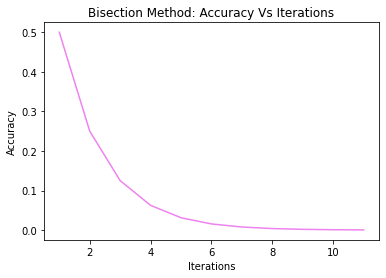

Bisection Method Table
+-----------+-------------+--------------+---------------+------------------------+
| Iteration |      a      |      b       |       m       |          f(m)          |
+-----------+-------------+--------------+---------------+------------------------+
|     1     |     0.0     |     1.0      |      0.5      |  0.05322192654030866   |
|     2     |     0.5     |     1.0      |      0.75     |  -0.8560611435856852   |
|     3     |     0.5     |     0.75     |     0.625     |   -0.356690603889921   |
|     4     |     0.5     |    0.625     |     0.5625    |    -0.1412937453091    |
|     5     |     0.5     |    0.5625    |    0.53125    |  -0.04151221167208241  |
|     6     |     0.5     |   0.53125    |    0.515625   |  0.006475340827341247  |
|     7     |   0.515625  |   0.53125    |   0.5234375   |  -0.01736202527677333  |
|     8     |   0.515625  |  0.5234375   |   0.51953125  | -0.005404401827669103  |
|     9     |   0.515625  |  0.51953125  |  0.5175781

In [86]:
b_acc,Bisection_table = BisectionMethod(f,x0,x1,e)
b_i = []
b_a = []
for i in b_acc:
    b_i.append(i[0])
    b_a.append(i[1])
plt.title("Bisection Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(b_i,b_a,color = 'violet')
plt.show()
print("Bisection Method Table")
print(Bisection_table)

## False Position Method



*** FALSE POSITION METHOD IMPLEMENTATION ***
Iteration-  1, x0 = 0.000000  x1 = 1.000000  x2 = 0.314665 and f(x2) = 0.519871
Iteration-  2, x0 = 0.314665  x1 = 1.000000  x2 = 0.446728 and f(x2) = 0.203545
Iteration-  3, x0 = 0.446728  x1 = 1.000000  x2 = 0.494015 and f(x2) = 0.070802
Iteration-  4, x0 = 0.494015  x1 = 1.000000  x2 = 0.509946 and f(x2) = 0.023608
Iteration-  5, x0 = 0.509946  x1 = 1.000000  x2 = 0.515201 and f(x2) = 0.007760
Iteration-  6, x0 = 0.515201  x1 = 1.000000  x2 = 0.516922 and f(x2) = 0.002539
Iteration-  7, x0 = 0.516922  x1 = 1.000000  x2 = 0.517485 and f(x2) = 0.000829

Final Root Found
Iteration-  7, x0 = 0.516922  x1 = 1.000000  x2 = 0.517485 and f(x2) = 0.000829
Required Root is: 0.517485


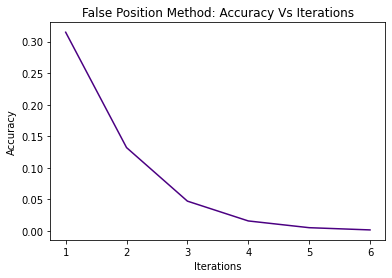

False Position Method Table
+-----------+---------------------+-----+---------------------+-----------------------+
| Iteration |          x0         |  x1 |          x2         |         f(x2)         |
+-----------+---------------------+-----+---------------------+-----------------------+
|     1     |         0.0         | 1.0 | 0.31466533780077094 |   0.5198711737709334  |
|     2     | 0.31466533780077094 | 1.0 | 0.44672814459133386 |  0.20354477776832103  |
|     3     | 0.44672814459133386 | 1.0 |  0.4940153365958987 |  0.07080234897836546  |
|     4     |  0.4940153365958987 | 1.0 |  0.5099461403652471 |  0.023607718826251012 |
|     5     |  0.5099461403652471 | 1.0 |  0.5152010099022496 |  0.007760113728615847 |
|     6     |  0.5152010099022496 | 1.0 |  0.5169222100105165 | 0.0025388646887650745 |
|     7     |  0.5169222100105165 | 1.0 |  0.517484676784512  | 0.0008293578901883425 |
+-----------+---------------------+-----+---------------------+-----------------------+


In [87]:
f_acc,False_position_table = FalsePosition(f,x0,x1,e)
f_i = []
f_a = []
if f_acc!=0:
    for i in f_acc:
        f_i.append(i[0])
        f_a.append(i[1])
    plt.title("False Position Method: Accuracy Vs Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.plot(f_i,f_a,color = 'indigo')
    plt.show()
    print("False Position Method Table")
    print(False_position_table)


## Secant Method



*** SECANT METHOD IMPLEMENTATION ***
Iteration-  1, a = 0.000000   b =1.000000  c = 0.314665  f(x2) = 0.519871
Iteration-  2, a = 1.000000   b =0.314665  c = 0.446728  f(x2) = 0.203545
Iteration-  3, a = 0.314665   b =0.446728  c = 0.531706  f(x2) = -0.042931
Iteration-  4, a = 0.446728   b =0.531706  c = 0.516904  f(x2) = 0.002593
Iteration-  5, a = 0.531706   b =0.516904  c = 0.517747  f(x2) = 0.000030

Final Root Found
Iteration-  5, a = 0.531706   b =0.516904  c = 0.517747  f(x2) = 0.000030
Required root is: 0.516904467567368


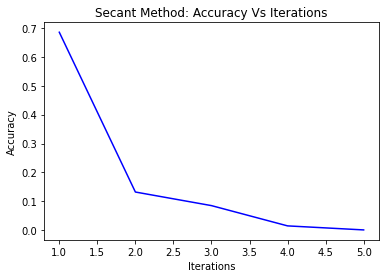

+-----------+--------------------+--------------------+--------------------+------------------------+
| Iteration |         x0         |         x1         |         x2         |         f(x2)          |
+-----------+--------------------+--------------------+--------------------+------------------------+
|     1     |        0.0         |        1.0         | 0.314665337800771  |   0.5198711737709334   |
|     2     |        1.0         | 0.314665337800771  | 0.446728144591334  |   0.2035447777683207   |
|     3     | 0.314665337800771  | 0.446728144591334  | 0.5317058606445456 | -0.042931093234745754  |
|     4     | 0.446728144591334  | 0.5317058606445456 | 0.5169044675673677 | 0.0025927631411296614  |
|     5     | 0.5317058606445456 | 0.5169044675673677 | 0.517747465271495  | 3.0111941065058545e-05 |
+-----------+--------------------+--------------------+--------------------+------------------------+


In [88]:
s_acc,Secant_table = SecantMethod(f,x0,x1,e)
s_i = []
s_a = []
for i in s_acc:
    s_i.append(i[0])
    s_a.append(i[1])
plt.title("Secant Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(s_i,s_a,color = 'blue')
plt.show()

print(Secant_table)

## Newton Raphson Method



*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration =   1, x0 = 0.000000 x1 = 1.000000   f(x1) = -2.177980 
Iteration =   2, x0 = 1.000000 x1 = 0.653079   f(x1) = -0.460642 
Iteration =   3, x0 = 0.653079 x1 = 0.531343   f(x1) = -0.041803 
Iteration =   4, x0 = 0.531343 x1 = 0.517910   f(x1) = -0.000464 
Iteration =   5, x0 = 0.517910 x1 = 0.517757   f(x1) = -0.000000 

Final Root Found
Iteration =   5, x0 = 0.517910 x1 = 0.517757   f(x1) = -0.000000 
Required root is: 0.517757


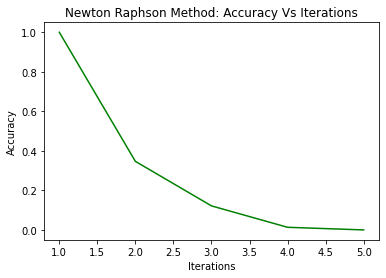

+-----------+--------------------+--------------------+-------------------------+
| Iteration |         x0         |         x1         |          f(x1)          |
+-----------+--------------------+--------------------+-------------------------+
|     1     |        0.0         |        1.0         |   -2.1779795225909053   |
|     2     |        1.0         | 0.6530794035261767 |   -0.46064212037687036  |
|     3     | 0.6530794035261767 | 0.5313433676065809 |   -0.04180273401019585  |
|     4     | 0.5313433676065809 | 0.5179099131356748 | -0.00046413358756547396 |
|     5     | 0.5179099131356748 | 0.5177573831648338 |  -5.926779722553732e-08 |
+-----------+--------------------+--------------------+-------------------------+


In [89]:
n_acc,NR_table = NewtonRaphson(f,f1,x0,e)
n_i = []
n_a = []
for i in n_acc:
    n_i.append(i[0])
    n_a.append(i[1])
plt.title("Newton Raphson Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(n_i,n_a,color = 'green')
plt.show()
print(NR_table)

## Fixed Point Iteration Method



*** FIXED POINT ITERATION METHOD ***
Iteration =   1, x0 = 0.000000  x1 = 1.000000   f(x1) = -2.177980 
Iteration =   2, x0 = 1.000000  x1 = 0.198766   f(x1) = 0.737837 
Iteration =   3, x0 = 0.198766  x1 = 0.803602   f(x1) = -1.100783 
Iteration =   4, x0 = 0.803602  x1 = 0.310766   f(x1) = 0.528068 
Iteration =   5, x0 = 0.310766  x1 = 0.697780   f(x1) = -0.635768 
Iteration =   6, x0 = 0.697780  x1 = 0.381365   f(x1) = 0.369733 
Iteration =   7, x0 = 0.381365  x1 = 0.633866   f(x1) = -0.389018 
Iteration =   8, x0 = 0.633866  x1 = 0.427477   f(x1) = 0.254528 
Iteration =   9, x0 = 0.427477  x1 = 0.593468   f(x1) = -0.245323 
Iteration =  10, x0 = 0.593468  x1 = 0.457950   f(x1) = 0.173020 
Iteration =  11, x0 = 0.457950  x1 = 0.567399   f(x1) = -0.157405 
Iteration =  12, x0 = 0.567399  x1 = 0.478151   f(x1) = 0.116548 
Iteration =  13, x0 = 0.478151  x1 = 0.550402   f(x1) = -0.102055 
Iteration =  14, x0 = 0.550402  x1 = 0.491545   f(x1) = 0.078008 
Iteration =  15, x0 = 0.491545

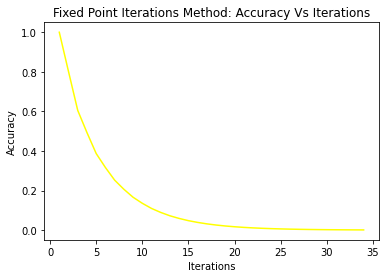

+-----------+---------------------+---------------------+------------------------+
| Iteration |          x0         |          x1         |         f(x1)          |
+-----------+---------------------+---------------------+------------------------+
|     1     |         0.0         |         1.0         |  -2.1779795225909053   |
|     2     |         1.0         | 0.19876611034641298 |   0.7378368632834555   |
|     3     | 0.19876611034641298 |  0.8036016811873258 |  -1.1007829585465245   |
|     4     |  0.8036016811873258 |  0.3107662512005325 |   0.5280682372310752   |
|     5     |  0.3107662512005325 |  0.6977796293660321 |  -0.6357684099710488   |
|     6     |  0.6977796293660321 |  0.381364601116034  |  0.36973252562795345   |
|     7     |  0.381364601116034  |  0.6338656087641654 |  -0.38901826778913273  |
|     8     |  0.6338656087641654 |  0.4274770304091126 |   0.2545281870951104   |
|     9     |  0.4274770304091126 |  0.5934681937814305 |  -0.2453231571447929   |
|   

In [90]:
fx_acc,Fixed_point_iteration_table = fixedPointIteration(f,G,x0,e)
fx_i = []
fx_a = []
for i in fx_acc:
    fx_i.append(i[0])
    fx_a.append(i[1])
plt.title("Fixed Point Iterations Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(fx_i,fx_a,color = 'yellow')
plt.show()
print(Fixed_point_iteration_table)

## Modified Newton Raphson Method



*** MODIFIED NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration =   1, x0 = 0.000000   x1 = 0.250000   f(x1) = 0.647906 
Iteration =   2, x0 = 0.250000   x1 = 0.452357   f(x1) = 0.188308 
Iteration =   3, x0 = 0.452357   x1 = 0.514111   f(x1) = 0.011060 
Iteration =   4, x0 = 0.514111   x1 = 0.517746   f(x1) = 0.000034 
Iteration =   5, x0 = 0.517746   x1 = 0.517757   f(x1) = 0.000000 

Final Root Found:
Iteration =   5, x0 = 0.517746   x1 = 0.517757   f(x1) = 0.000000 
Required root is: 0.517757


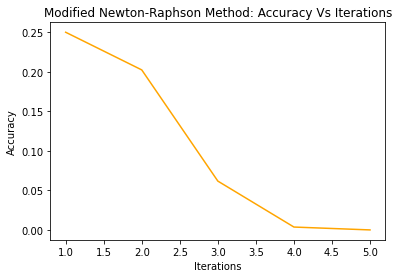

+-----------+---------------------+---------------------+-----------------------+
| Iteration |          x0         |          x1         |         f(x1)         |
+-----------+---------------------+---------------------+-----------------------+
|     1     |         0.0         |         0.25        |   0.6479060675387094  |
|     2     |         0.25        | 0.45235711613633345 |   0.1883079619704996  |
|     3     | 0.45235711613633345 |  0.5141106338262553 |  0.011059972837116239 |
|     4     |  0.5141106338262553 |  0.5177462180775807 | 3.390599238339842e-05 |
|     5     |  0.5177462180775807 |  0.5177573635784439 | 3.164245532261134e-10 |
+-----------+---------------------+---------------------+-----------------------+


In [91]:
mn_acc,Modified_NR_table = modifiedNewtonRaphson(f,f1,f2,x0,e)
mn_i = []
mn_a = []
for i in mn_acc:
    mn_i.append(i[0])
    mn_a.append(i[1])
plt.title("Modified Newton-Raphson Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(mn_i,mn_a,color = 'orange')
plt.show()
print(Modified_NR_table)

## Muller's Method



*** MULLER METHOD IMPLEMENTATION ***
Iteration =   3  a = -3.846436 b = -10.870852  c = -6.651796  p = 0.604127  f(p) = -0.282346
Iteration =   4  a = -4.642559 b = -2.950630  c = -0.282346  p = 0.486765  f(p) = 0.091862
Iteration =   5  a = -3.870059 b = -2.734294  c = 0.091862  p = 0.518900  f(p) = -0.003479
Iteration =   6  a = -2.599806 b = -3.050462  c = -0.003479  p = 0.517758  f(p) = -0.000003

Final Root found
Iteration =   6  a = -2.599806 b = -3.050462  c = -0.003479  p = 0.517758  f(p) = -0.000003
Required Root is: 0.517758


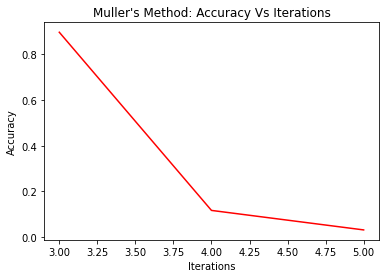

+-----------+---------------------+---------------------+------------------------+--------------------+-------------------------+
| Iteration |          a          |          b          |           c            |      p (root)      |           f(p)          |
+-----------+---------------------+---------------------+------------------------+--------------------+-------------------------+
|     3     | -3.8464361599373813 | -10.870851842465669 |   -6.651796403839394   | 0.6041272719107791 |   -0.2823461560568532   |
|     4     |  -4.642558808957501 |  -2.950629515984926 |  -0.2823461560568532   | 0.4867651469241623 |   0.09186211523729948   |
|     5     | -3.8700590424119743 |  -2.734294283206072 |  0.09186211523729948   | 0.5188998519699319 |  -0.0034789168430902073 |
|     6     |  -2.599805576774044 |  -3.050461899976916 | -0.0034789168430902073 | 0.5177582855593464 | -2.8044656993353456e-06 |
+-----------+---------------------+---------------------+------------------------+--------

In [92]:
m_acc,Muller_table = Muller(f,x0,x1,x2,e)
m_i = []
m_a = []
for i in m_acc:
    m_i.append(i[0])
    m_a.append(i[1])
plt.title("Muller's Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(m_i,m_a,color = 'red')
plt.show()
print(Muller_table)

# Tables and Combined Plot

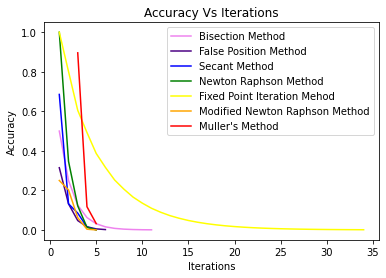

In [101]:

plt.title("Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.plot(b_i,b_a,color = 'violet', label='Bisection Method')                         # Bisection

plt.plot(f_i,f_a,color = 'indigo',label='False Position Method')                     # False Position

plt.plot(s_i,s_a,color = 'blue', label='Secant Method')                              # Secant

plt.plot(n_i,n_a,color = 'green', label='Newton Raphson Method')                     # Newton Raphson

plt.plot(fx_i,fx_a,color = 'yellow', label='Fixed Point Iteration Mehod')            # Fixed Point Iterations

plt.plot(mn_i,mn_a,color = 'orange',label='Modified Newton Raphson Method')          # Modified Newton Raphson

plt.plot(m_i,m_a,color = 'red',label= "Muller's Method")                             # Muller's Method

plt.legend(loc="upper right")
plt.show()

In [94]:
print("Bisection Method Table")
print(Bisection_table)

Bisection Method Table
+-----------+-------------+--------------+---------------+------------------------+
| Iteration |      a      |      b       |       m       |          f(m)          |
+-----------+-------------+--------------+---------------+------------------------+
|     1     |     0.0     |     1.0      |      0.5      |  0.05322192654030866   |
|     2     |     0.5     |     1.0      |      0.75     |  -0.8560611435856852   |
|     3     |     0.5     |     0.75     |     0.625     |   -0.356690603889921   |
|     4     |     0.5     |    0.625     |     0.5625    |    -0.1412937453091    |
|     5     |     0.5     |    0.5625    |    0.53125    |  -0.04151221167208241  |
|     6     |     0.5     |   0.53125    |    0.515625   |  0.006475340827341247  |
|     7     |   0.515625  |   0.53125    |   0.5234375   |  -0.01736202527677333  |
|     8     |   0.515625  |  0.5234375   |   0.51953125  | -0.005404401827669103  |
|     9     |   0.515625  |  0.51953125  |  0.5175781

In [95]:
print("False Position Method Table")
print(False_position_table)

False Position Method Table
+-----------+---------------------+-----+---------------------+-----------------------+
| Iteration |          x0         |  x1 |          x2         |         f(x2)         |
+-----------+---------------------+-----+---------------------+-----------------------+
|     1     |         0.0         | 1.0 | 0.31466533780077094 |   0.5198711737709334  |
|     2     | 0.31466533780077094 | 1.0 | 0.44672814459133386 |  0.20354477776832103  |
|     3     | 0.44672814459133386 | 1.0 |  0.4940153365958987 |  0.07080234897836546  |
|     4     |  0.4940153365958987 | 1.0 |  0.5099461403652471 |  0.023607718826251012 |
|     5     |  0.5099461403652471 | 1.0 |  0.5152010099022496 |  0.007760113728615847 |
|     6     |  0.5152010099022496 | 1.0 |  0.5169222100105165 | 0.0025388646887650745 |
|     7     |  0.5169222100105165 | 1.0 |  0.517484676784512  | 0.0008293578901883425 |
+-----------+---------------------+-----+---------------------+-----------------------+


In [96]:
print("Secant Method Table")
print(Secant_table)

Secant Method Table
+-----------+--------------------+--------------------+--------------------+------------------------+
| Iteration |         x0         |         x1         |         x2         |         f(x2)          |
+-----------+--------------------+--------------------+--------------------+------------------------+
|     1     |        0.0         |        1.0         | 0.314665337800771  |   0.5198711737709334   |
|     2     |        1.0         | 0.314665337800771  | 0.446728144591334  |   0.2035447777683207   |
|     3     | 0.314665337800771  | 0.446728144591334  | 0.5317058606445456 | -0.042931093234745754  |
|     4     | 0.446728144591334  | 0.5317058606445456 | 0.5169044675673677 | 0.0025927631411296614  |
|     5     | 0.5317058606445456 | 0.5169044675673677 | 0.517747465271495  | 3.0111941065058545e-05 |
+-----------+--------------------+--------------------+--------------------+------------------------+


In [97]:
print("Newton Raphson Method Table")
print(NR_table)

Newton Raphson Method Table
+-----------+--------------------+--------------------+-------------------------+
| Iteration |         x0         |         x1         |          f(x1)          |
+-----------+--------------------+--------------------+-------------------------+
|     1     |        0.0         |        1.0         |   -2.1779795225909053   |
|     2     |        1.0         | 0.6530794035261767 |   -0.46064212037687036  |
|     3     | 0.6530794035261767 | 0.5313433676065809 |   -0.04180273401019585  |
|     4     | 0.5313433676065809 | 0.5179099131356748 | -0.00046413358756547396 |
|     5     | 0.5179099131356748 | 0.5177573831648338 |  -5.926779722553732e-08 |
+-----------+--------------------+--------------------+-------------------------+


In [98]:
print("Fixed Point Iteration Method Table")
print(Fixed_point_iteration_table)

Fixed Point Iteration Method Table
+-----------+---------------------+---------------------+------------------------+
| Iteration |          x0         |          x1         |         f(x1)          |
+-----------+---------------------+---------------------+------------------------+
|     1     |         0.0         |         1.0         |  -2.1779795225909053   |
|     2     |         1.0         | 0.19876611034641298 |   0.7378368632834555   |
|     3     | 0.19876611034641298 |  0.8036016811873258 |  -1.1007829585465245   |
|     4     |  0.8036016811873258 |  0.3107662512005325 |   0.5280682372310752   |
|     5     |  0.3107662512005325 |  0.6977796293660321 |  -0.6357684099710488   |
|     6     |  0.6977796293660321 |  0.381364601116034  |  0.36973252562795345   |
|     7     |  0.381364601116034  |  0.6338656087641654 |  -0.38901826778913273  |
|     8     |  0.6338656087641654 |  0.4274770304091126 |   0.2545281870951104   |
|     9     |  0.4274770304091126 |  0.5934681937814

In [99]:
print("Modified Newton Raphson Method Table")
print(Modified_NR_table)

Modified Newton Raphson Method Table
+-----------+---------------------+---------------------+-----------------------+
| Iteration |          x0         |          x1         |         f(x1)         |
+-----------+---------------------+---------------------+-----------------------+
|     1     |         0.0         |         0.25        |   0.6479060675387094  |
|     2     |         0.25        | 0.45235711613633345 |   0.1883079619704996  |
|     3     | 0.45235711613633345 |  0.5141106338262553 |  0.011059972837116239 |
|     4     |  0.5141106338262553 |  0.5177462180775807 | 3.390599238339842e-05 |
|     5     |  0.5177462180775807 |  0.5177573635784439 | 3.164245532261134e-10 |
+-----------+---------------------+---------------------+-----------------------+


In [100]:
print("Muller's Method Table")
print(Muller_table)

Muller's Method Table
+-----------+---------------------+---------------------+------------------------+--------------------+-------------------------+
| Iteration |          a          |          b          |           c            |      p (root)      |           f(p)          |
+-----------+---------------------+---------------------+------------------------+--------------------+-------------------------+
|     3     | -3.8464361599373813 | -10.870851842465669 |   -6.651796403839394   | 0.6041272719107791 |   -0.2823461560568532   |
|     4     |  -4.642558808957501 |  -2.950629515984926 |  -0.2823461560568532   | 0.4867651469241623 |   0.09186211523729948   |
|     5     | -3.8700590424119743 |  -2.734294283206072 |  0.09186211523729948   | 0.5188998519699319 |  -0.0034789168430902073 |
|     6     |  -2.599805576774044 |  -3.050461899976916 | -0.0034789168430902073 | 0.5177582855593464 | -2.8044656993353456e-06 |
+-----------+---------------------+---------------------+-----------